In [2]:
import gzip
from collections import *
import os
import csv
import json
import pandas as pd
import glob
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter,defaultdict


In [3]:
european_user_file = '/shared/2/projects/cross-lingual-exchange/data/european_users.json'
with open(european_user_file,'r') as f:
    user_dict = json.load(f)

In [5]:
network_files = glob.glob("/shared/2/projects/cross-lingual-exchange/data/network_subsets/*")

In [9]:
os.path.splitext(network_files[0])

('/shared/2/projects/cross-lingual-exchange/data/network_subsets/AZ_PL',
 '.tsv')

In [10]:
 os.path.splitext(os.path.basename(network_files[0]))[0]

'AZ_PL'

In [48]:
all_entries = []
for filename in network_files:
    with open(filename,'r') as f:
        new_entry = {}
        country_pair =  os.path.splitext(os.path.basename(filename))[0]
        country1 = country_pair.split('_')[0]
        country2 = country_pair.split('_')[1]
        nodes = set()
        edges = 0
        cross_edges = 0
        country_nodes = Counter()
        for i,row in enumerate(f):
            (uid1,uid2) = row.split()
            c1 = user_dict[uid1][1]
            c2 = user_dict[uid2][1]
            edges += 1
            if c1 != c2:
                cross_edges += 1   
            if uid1 not in nodes:
                nodes.add(uid1)
                country_nodes[c1] += 1
            if uid2 not in nodes:
                nodes.add(uid2)
                country_nodes[c2] += 1
        new_entry['country_pair'] = country_pair
        new_entry['edges'] = edges
        new_entry['cross_edges'] = cross_edges
        new_entry['fraction_cross'] = float(cross_edges)/edges
        new_entry['nodes_country1'] = country_nodes[country1]
        new_entry['nodes_country2'] = country_nodes[country2]
        all_entries.append(new_entry)   
df = pd.DataFrame(all_entries)
df.to_csv('/shared/2/projects/cross-lingual-exchange/data/network_subset_sizes.tsv',sep='\t')

In [68]:
df.sort_values('fraction_cross',ascending=False)[:10]
#HR = croatia
#BA = bosnia & herzegovina
#RS = serbia
# RU = russia
# IE = Ireland
# UA = Ukraine
# BY = belarus
# ME = montenegro
country_pairs = df.sort_values('fraction_cross',ascending=False)[:10]['country_pair']
country_codes = {}
country_codes['BA'] = 'Bosnia'
country_codes['HR'] = 'Croatia'
country_codes['RS'] = 'Serbia'
country_codes['RU'] = 'Russia'
country_codes['IE'] = 'Ireland'
country_codes['AT'] = 'Austria'
country_codes['BE'] = 'Belgium'
country_codes['DE'] = 'Germany'
country_codes['GB'] = 'United Kingdom'
country_codes['UA'] = 'Ukraine'
country_codes['CH'] = 'Switzerland'
country_codes['BY'] = 'Belarus'
country_codes['ME'] = 'Montenegro'
country_names = [(country_codes[x.split('_')[0]],country_codes[x.split('_')[1]]) for x in country_pairs]


In [73]:
df_top = df.sort_values('fraction_cross',ascending=False)[:10]
df_top['countries'] = country_names 
df_top.set_index('countries').reset_index()

,countries,country_pair,edges,cross_edges,fraction_cross,nodes_country1,nodes_country2
0,"(Bosnia, Serbia)",BA_RS,716150,28446,0.039721,4505,90093
1,"(Russia, Ukraine)",RU_UA,7377301,205571,0.027865,1385716,148203
2,"(Austria, Germany)",AT_DE,3782834,99447,0.026289,39934,578704
3,"(Austria, Switzerland)",AT_CH,420353,10980,0.026121,36830,72956
4,"(Belgium, Germany)",BE_DE,4439397,109253,0.024610,198036,581113
5,"(United Kingdom, Ireland)",GB_IE,51945711,1250390,0.024071,8263547,439408
6,"(Montenegro, Serbia)",ME_RS,735828,17540,0.023837,7149,89887
7,"(Belarus, Russia)",BY_RU,7191855,169648,0.023589,104428,1386197
8,"(Croatia, Serbia)",HR_RS,761226,15559,0.020439,9570,89832
9,"(Bosnia, Montenegro)",BA_ME,45459,861,0.018940,3539,6983


In [76]:
df = df.drop(columns=['countries'])
df[df['country_pair'].isin(['DE_PL','DE_TR','ES_PT'])]

,country_pair,edges,cross_edges,fraction_cross,nodes_country1,nodes_country2
817,DE_PL,5999865,74854,0.012476,579279,231576
899,DE_TR,18992135,118806,0.006256,580682,3797532
1143,ES_PT,32512830,117510,0.003614,4894117,470471


<AxesSubplot:xlabel='nodes', ylabel='edges'>

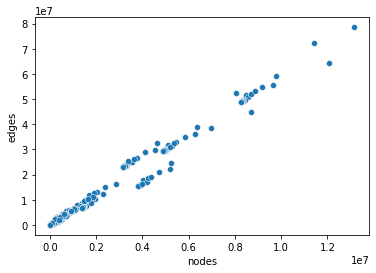

In [80]:
df['nodes'] = df['nodes_country1'] + df['nodes_country2']
sns.scatterplot(x='nodes',y='edges',data=df)

In [90]:
df.sort_values('nodes')[:5]

,country_pair,edges,cross_edges,fraction_cross,nodes_country1,nodes_country2,nodes
1025,LI_SM,891,0,0.0,190,248,438
257,AL_LI,925,0,0.0,295,190,485
465,AL_SM,462,0,0.0,295,248,543
613,AD_LI,1925,0,0.0,638,190,828
306,AD_SM,1462,0,0.0,638,248,886


In [91]:
df.sort_values('nodes',ascending=False)[:5]

,country_pair,edges,cross_edges,fraction_cross,nodes_country1,nodes_country2,nodes
605,ES_GB,78562214,439750,0.005597,4902928,8249884,13152812
789,GB_TR,64308419,124079,0.001929,8245586,3802733,12048319
421,FR_GB,72423238,526224,0.007266,3171149,8256416,11427565
431,GB_NL,59114678,886881,0.015003,8271765,1495114,9766879
559,GB_RU,55591433,56885,0.001023,8244732,1384565,9629297


<AxesSubplot:xlabel='fraction_cross', ylabel='Density'>

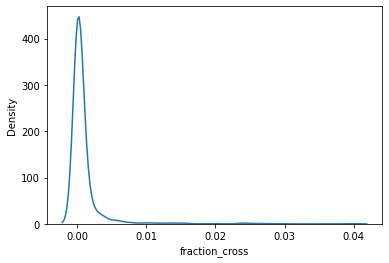

In [108]:
sns.kdeplot(x='fraction_cross',data=df)

In [1]:
1+1

2

In [4]:
import glob

In [5]:
network_calc_files = glob.glob('/shared/2/projects/cross-lingual-exchange/data/network_calculations/*')

In [25]:
all_data = []
for filename in network_calc_files:
    df = pd.read_csv(filename,sep='\t')
    data = {}
    data['country_pair'] = os.path.basename(filename).strip('.tsv')
    data['degree'] = df['degree'].mean()
    data['betw'] = df['betw'].mean()
    data['pagerank'] = df['pagerank'].mean()
    data['zero_betw'] = len(df[df['betw']==0]) / len(df)
    all_data.append(data)

In [55]:
df = pd.DataFrame(all_data)

In [27]:
df

,country_pair,degree,betw,pagerank,zero_betw
0,AZ_PL,20.236302,0.000016,4.048894e-06,0.355529
1,GR_NL,12.957645,0.000003,6.434265e-07,0.322964
2,IE_SK,9.283450,0.000011,2.492106e-06,0.372655
3,FI_MC,12.735948,0.000050,1.442752e-05,0.430286
4,DK_TR,8.109203,0.000001,2.604464e-07,0.356709
...,...,...,...,...,...
1171,BG_GR,14.096180,0.000034,9.818264e-06,0.458935
1172,AM_IE,9.294372,0.000011,2.488268e-06,0.372548
1173,FR_RO,14.604446,0.000001,3.162105e-07,0.321474
1174,ME_SM,10.483916,0.000384,1.386578e-04,0.392679


In [28]:
df.sort_values('betw')

,country_pair,degree,betw,pagerank,zero_betw
605,ES_GB,11.946071,3.929071e-07,7.602937e-08,0.309348
421,FR_GB,12.675183,4.276209e-07,8.750771e-08,0.321545
789,GB_TR,10.675086,4.413265e-07,8.299913e-08,0.333152
431,GB_NL,12.105132,4.835261e-07,1.023869e-07,0.321469
228,GB_IT,11.904960,5.084086e-07,1.088455e-07,0.332546
...,...,...,...,...,...
645,AM_BA,5.198881,1.192839e-03,1.749169e-04,0.559559
477,AM_LI,6.995912,1.266958e-03,4.088307e-04,0.539248
815,AL_MD,4.020505,1.923145e-03,7.886435e-04,0.608044
959,MD_SM,4.119574,2.159714e-03,8.190008e-04,0.579853


In [29]:
df.sort_values('betw',ascending=False)

,country_pair,degree,betw,pagerank,zero_betw
1003,LI_MD,5.121238,2.505070e-03,8.598452e-04,0.521066
959,MD_SM,4.119574,2.159714e-03,8.190008e-04,0.579853
815,AL_MD,4.020505,1.923145e-03,7.886435e-04,0.608044
477,AM_LI,6.995912,1.266958e-03,4.088307e-04,0.539248
645,AM_BA,5.198881,1.192839e-03,1.749169e-04,0.559559
...,...,...,...,...,...
228,GB_IT,11.904960,5.084086e-07,1.088455e-07,0.332546
431,GB_NL,12.105132,4.835261e-07,1.023869e-07,0.321469
789,GB_TR,10.675086,4.413265e-07,8.299913e-08,0.333152
421,FR_GB,12.675183,4.276209e-07,8.750771e-08,0.321545


In [30]:
df.sort_values('zero_betw')

,country_pair,degree,betw,pagerank,zero_betw
300,LI_PT,13.506870,0.000009,0.000002,0.271045
595,PT_SM,13.503360,0.000009,0.000002,0.271342
447,AL_PT,13.500087,0.000009,0.000002,0.271600
479,AD_PT,13.496289,0.000009,0.000002,0.271618
1161,MD_PT,13.491128,0.000009,0.000002,0.271799
...,...,...,...,...,...
82,LU_SM,2.842528,0.000397,0.000334,0.681377
625,MT_SM,2.455966,0.000347,0.000710,0.683949
892,AL_LU,2.821205,0.000378,0.000329,0.691472
849,AL_MT,2.421414,0.000309,0.000686,0.705559


In [31]:
df.sort_values('zero_betw',ascending=False)

,country_pair,degree,betw,pagerank,zero_betw
465,AL_SM,1.701657,0.000112,0.001842,0.753223
849,AL_MT,2.421414,0.000309,0.000686,0.705559
892,AL_LU,2.821205,0.000378,0.000329,0.691472
625,MT_SM,2.455966,0.000347,0.000710,0.683949
82,LU_SM,2.842528,0.000397,0.000334,0.681377
...,...,...,...,...,...
1161,MD_PT,13.491128,0.000009,0.000002,0.271799
479,AD_PT,13.496289,0.000009,0.000002,0.271618
447,AL_PT,13.500087,0.000009,0.000002,0.271600
595,PT_SM,13.503360,0.000009,0.000002,0.271342


<AxesSubplot:xlabel='degree', ylabel='betw'>

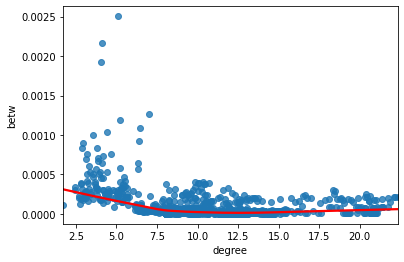

In [42]:
sns.regplot(x='degree',y='betw',data=df,line_kws={'color': 'r'},lowess=True)

<AxesSubplot:xlabel='pagerank', ylabel='betw'>

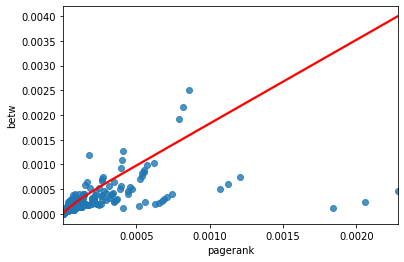

In [56]:
sns.regplot(x='pagerank',y='betw',data=df,line_kws={'color': 'r'},lowess=True)

In [45]:
df1 = df[df['country_pair'].isin(['DE_PL','DE_TR','ES_PT'])]

<AxesSubplot:xlabel='country_pair', ylabel='degree'>

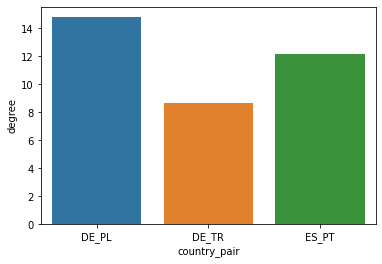

In [46]:
sns.barplot(x='country_pair',y='degree',data=df1)

<AxesSubplot:xlabel='country_pair', ylabel='pagerank'>

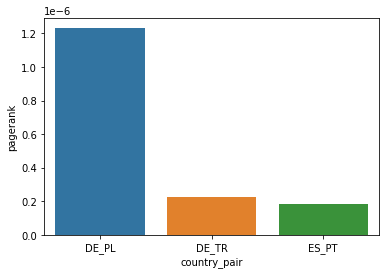

In [47]:
sns.barplot(x='country_pair',y='pagerank',data=df1)

<AxesSubplot:xlabel='country_pair', ylabel='betw'>

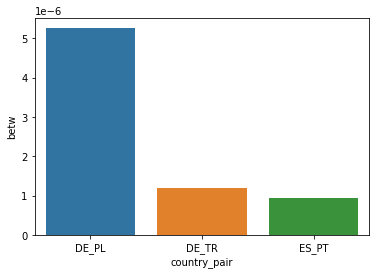

In [48]:
sns.barplot(x='country_pair',y='betw',data=df1)

<AxesSubplot:xlabel='country_pair', ylabel='zero_betw'>

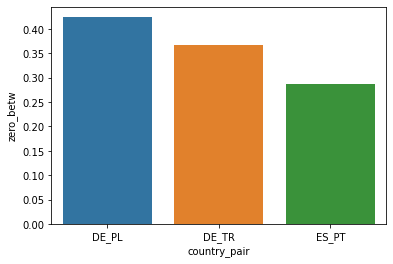

In [49]:
sns.barplot(x='country_pair',y='zero_betw',data=df1)

In [51]:
df_combined = []
for filename in ['DE_PL.tsv','DE_TR.tsv','ES_PT.tsv']:
    filename2 = os.path.join('/shared/2/projects/cross-lingual-exchange/data/network_calculations/',filename)
    df = pd.read_csv(filename2,sep='\t')
    df['country_pair'] = os.path.basename(filename).strip('.tsv')
    df_combined.append(df)

In [52]:
df_combined = pd.concat(df_combined)